In [1]:
%matplotlib notebook

In [2]:
import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import pprint
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
with open('data/yzy_sesame_9.json') as f:
    org = json.load(f)

    print(json.dumps(org, indent=4))
    travis_white = pd.DataFrame(org["ProductActivity"])

{
    "ProductActivity": [
        {
            "chainId": "13119708952244572760",
            "amount": 323,
            "createdAt": "2019-07-27T15:06:56+00:00",
            "shoeSize": "9",
            "productId": null,
            "skuUuid": "d7200b6e-651b-4bdf-871f-a38109503da9",
            "state": "480",
            "customerId": null,
            "localAmount": 323,
            "localCurrency": "USD"
        },
        {
            "chainId": "13121131202951172098",
            "amount": 322,
            "createdAt": "2019-07-27T06:46:52+00:00",
            "shoeSize": "9",
            "productId": null,
            "skuUuid": "d7200b6e-651b-4bdf-871f-a38109503da9",
            "state": "480",
            "customerId": null,
            "localAmount": 322,
            "localCurrency": "USD"
        },
        {
            "chainId": "13121034113987918065",
            "amount": 320,
            "createdAt": "2019-07-26T23:55:57+00:00",
            "shoeSize": "9",
        

In [4]:
travis_white_data =  travis_white.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})
travis_white_data.head()

price               chainId              purchase_date customerId  \
0  323.0  13119708952244572760  2019-07-27T15:06:56+00:00       None   
1  322.0  13121131202951172098  2019-07-27T06:46:52+00:00       None   
2  320.0  13121034113987918065  2019-07-26T23:55:57+00:00       None   
3  324.0  13120523671114864221  2019-07-26T14:50:02+00:00       None   
4  322.0  13104751589210663357  2019-07-26T02:20:24+00:00       None   

   localAmount localCurrency productId shoe_size  \
0          323           USD      None         9   
1          322           USD      None         9   
2          320           USD      None         9   
3          324           USD      None         9   
4          322           USD      None         9   

                                    sku state  
0  d7200b6e-651b-4bdf-871f-a38109503da9   480  
1  d7200b6e-651b-4bdf-871f-a38109503da9   480  
2  d7200b6e-651b-4bdf-871f-a38109503da9   480  
3  d7200b6e-651b-4bdf-871f-a38109503da9   480  
4  d7200b6e-651b-4bdf-871f-a38109503da9   480

In [5]:
travis_white_data =  travis_white_data.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})

In [6]:
new_travis_white_data = travis_white_data[['price', 'purchase_date', 'shoe_size']]
new_travis_white_data.head()

price              purchase_date shoe_size
0  323.0  2019-07-27T15:06:56+00:00         9
1  322.0  2019-07-27T06:46:52+00:00         9
2  320.0  2019-07-26T23:55:57+00:00         9
3  324.0  2019-07-26T14:50:02+00:00         9
4  322.0  2019-07-26T02:20:24+00:00         9

In [7]:
size9_travis_white = new_travis_white_data.loc[new_travis_white_data["shoe_size"] == "9", : ]
size9_travis_white.head()

price              purchase_date shoe_size
0  323.0  2019-07-27T15:06:56+00:00         9
1  322.0  2019-07-27T06:46:52+00:00         9
2  320.0  2019-07-26T23:55:57+00:00         9
3  324.0  2019-07-26T14:50:02+00:00         9
4  322.0  2019-07-26T02:20:24+00:00         9

In [8]:
newsize9 = size9_travis_white["purchase_date"].str.replace(r"00:00", " ")
newsize9.head()

0    2019-07-27T15:06:56+ 
1    2019-07-27T06:46:52+ 
2    2019-07-26T23:55:57+ 
3    2019-07-26T14:50:02+ 
4    2019-07-26T02:20:24+ 
Name: purchase_date, dtype: object

In [9]:
new2size9 = newsize9.str.replace(r"+", " ")
new2size9.head()

0    2019-07-27T15:06:56  
1    2019-07-27T06:46:52  
2    2019-07-26T23:55:57  
3    2019-07-26T14:50:02  
4    2019-07-26T02:20:24  
Name: purchase_date, dtype: object

In [10]:
new3size9 = new2size9.str.replace(r"T", " ")
new3size9.head()

0    2019-07-27 15:06:56  
1    2019-07-27 06:46:52  
2    2019-07-26 23:55:57  
3    2019-07-26 14:50:02  
4    2019-07-26 02:20:24  
Name: purchase_date, dtype: object

In [11]:
new3size9
new3size_new=[i.split()[0] for i in new3size9]
new3size_new

['2019-07-27',
 '2019-07-27',
 '2019-07-26',
 '2019-07-26',
 '2019-07-26',
 '2019-07-25',
 '2019-07-25',
 '2019-07-25',
 '2019-07-24',
 '2019-07-24',
 '2019-07-23',
 '2019-07-23',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-21',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-17',
 '2019-07-16',
 '2019-07-16',
 '2019-07-15',
 '2019-07-15',
 '2019-07-15',
 '2019-07-15',
 '2019-07-15',
 '2019-07-15',
 '2019-07-15',
 '2019-07-14',
 '2019-07-14',
 '2019-07-13',
 '2019-07-13',
 '2019-07-13',
 '2019-07-12',
 '2019-07-12',
 '2019-07-12',
 '2019-07-12',
 '2019-07-11',
 '2019-07-11',
 '2019-07-11',
 '2019-07-11',
 '2019-07-11',
 '2019-07-11',
 '2019-07-11',
 '2019-07-10',
 '2019-07-10',
 '2019-07-10',
 '2019-07-10',
 '2019-07-10',
 '2019-07-09',
 '2019-07-09',
 '2019-07-09',
 '2019-07-09',
 '2019-07-09',
 '2019-07-09',
 '2019-07-

In [12]:
size9sum = pd.DataFrame({"Price": size9_travis_white["price"],"Purchase_date": new3size_new, "Shoe_size": size9_travis_white["shoe_size"]})
size9sum.head()

Price Purchase_date Shoe_size
0  323.0    2019-07-27         9
1  322.0    2019-07-27         9
2  320.0    2019-07-26         9
3  324.0    2019-07-26         9
4  322.0    2019-07-26         9

In [13]:
size9sum["Purchase_date"] = pd.to_datetime(size9sum["Purchase_date"]).dt.strftime("%Y%m%d")
size9sum.head()

Price Purchase_date Shoe_size
0  323.0      20190727         9
1  322.0      20190727         9
2  320.0      20190726         9
3  324.0      20190726         9
4  322.0      20190726         9

In [14]:
#making it into a list and cutting it
purchase = list(size9sum["Purchase_date"])
X = purchase[::-1]

price = list(size9sum["Price"])
Y = price[::-1]


<IPython.core.display.Javascript object>


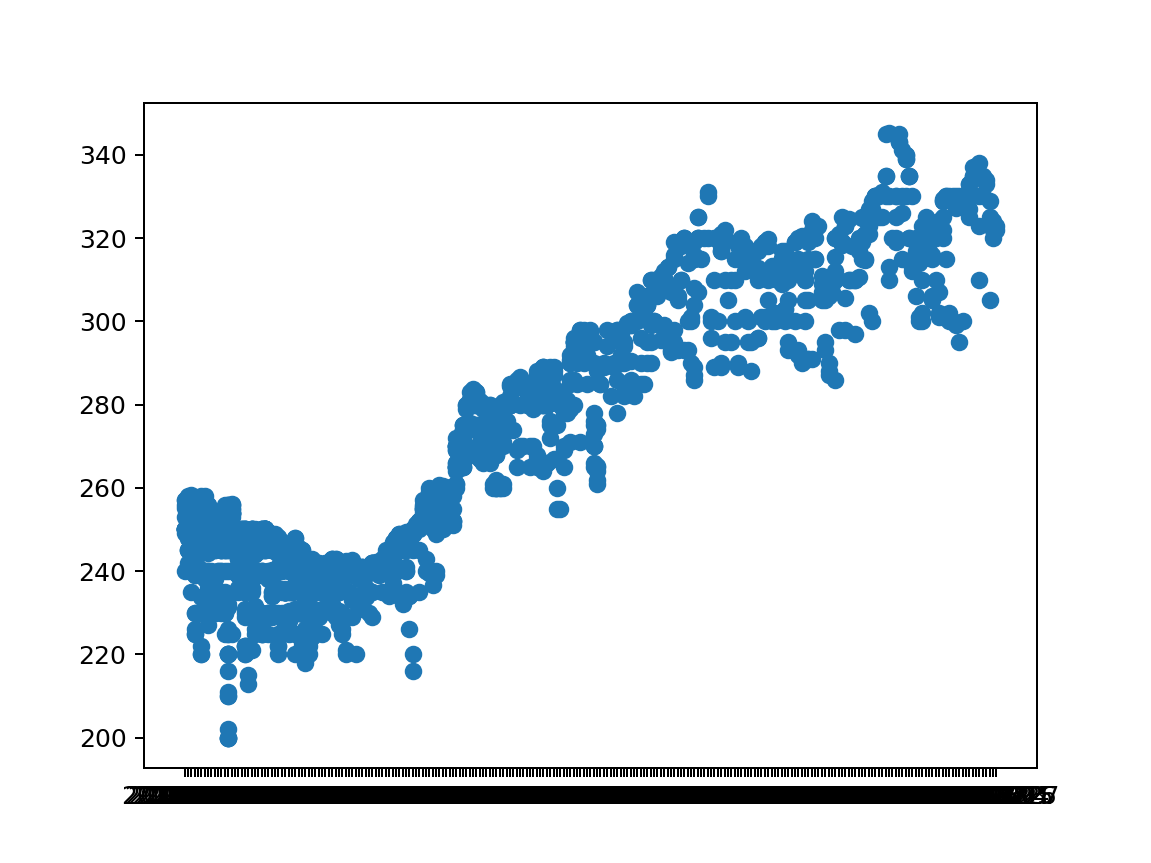

In [15]:
plt.scatter(X, Y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 150, random_state = 0)

In [17]:
X = np.array(X)
X

array(['20181124', '20181124', '20181124', ..., '20190726', '20190727',
       '20190727'], dtype='<U8')

In [18]:
X = X.reshape(-1,1)

X

array([['20181124'],
       ['20181124'],
       ['20181124'],
       ...,
       ['20190726'],
       ['20190727'],
       ['20190727']], dtype='<U8')

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# X_train
X_test

array(['20181208', '20190207', '20190131', '20181225', '20190520',
       '20190205', '20190324', '20190216', '20190617', '20181125',
       '20190214', '20190326', '20181202', '20181130', '20181225',
       '20190629', '20181211', '20190711', '20190326', '20190209',
       '20190702', '20190212', '20181228', '20190406', '20190126',
       '20190224', '20181212', '20190201', '20181213', '20190708',
       '20190214', '20190128', '20190709', '20190520', '20190121',
       '20181209', '20190118', '20181129', '20181212', '20190116',
       '20181125', '20190220', '20190213', '20181125', '20190412',
       '20181214', '20181207', '20181204', '20190530', '20190131',
       '20190326', '20190220', '20181127', '20181216', '20181204',
       '20190110', '20181212', '20190529', '20190118', '20190327',
       '20190101', '20190322', '20190129', '20190225', '20181126',
       '20181228', '20190108', '20190211', '20181213', '20181206',
       '20181203', '20190104', '20190610', '20190505', '201812

In [20]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

X_test

array([['20181208'],
       ['20190207'],
       ['20190131'],
       ['20181225'],
       ['20190520'],
       ['20190205'],
       ['20190324'],
       ['20190216'],
       ['20190617'],
       ['20181125'],
       ['20190214'],
       ['20190326'],
       ['20181202'],
       ['20181130'],
       ['20181225'],
       ['20190629'],
       ['20181211'],
       ['20190711'],
       ['20190326'],
       ['20190209'],
       ['20190702'],
       ['20190212'],
       ['20181228'],
       ['20190406'],
       ['20190126'],
       ['20190224'],
       ['20181212'],
       ['20190201'],
       ['20181213'],
       ['20190708'],
       ['20190214'],
       ['20190128'],
       ['20190709'],
       ['20190520'],
       ['20190121'],
       ['20181209'],
       ['20190118'],
       ['20181129'],
       ['20181212'],
       ['20190116'],
       ['20181125'],
       ['20190220'],
       ['20190213'],
       ['20181125'],
       ['20190412'],
       ['20181214'],
       ['20181207'],
       ['2018

In [21]:
X_test = X_test.astype(float)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([242.65815858, 278.74824985, 278.44345521, 242.72633633,
       280.0035225 , 278.74022894, 279.21747317, 278.78434395,
       280.3925367 , 242.32529076, 278.77632304, 279.22549408,
       242.63409585, 242.34534304, 242.72633633, 280.44066217,
       242.67018995, 280.76951954, 279.22549408, 278.75627076,
       280.73342544, 278.76830213, 242.7383677 , 279.54633054,
       278.42340293, 278.8164276 , 242.67420041, 278.72418711,
       242.67821086, 280.75748818, 278.77632304, 278.43142384,
       280.76149863, 280.0035225 , 278.40335065, 242.66216904,
       278.39131929, 242.34133258, 242.67420041, 278.38329837,
       242.32529076, 278.80038577, 278.77231258, 242.32529076,
       279.57039328, 242.68222132, 242.65414813, 242.64211676,
       280.04362705, 278.44345521, 279.22549408, 278.80038577,
       242.33331167, 242.69024223, 242.64211676, 278.35923564,
       242.67420041, 280.0396166 , 278.39131929, 279.22950454,
       278.32314154, 279.20945226, 278.4354343 , 278.82

In [24]:
import pickle
pickle.dump(regressor, open('model3.pkl','wb'))

In [25]:
model = pickle.load( open('model3.pkl','rb'))
print(model.predict([[20210102]]))

[358.53626692]
